<a href="https://colab.research.google.com/github/yanann11/nebius_llm_course/blob/main/topic1/1.2_tokenization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LLM Engineering Essentials by Nebius Academy

Course github: [link](https://github.com/Nebius-Academy/LLM-Engineering-Essentials/tree/main)

The course is in development now, with more materials coming soon.

# 1.2. Tokenization

Before going into the LLM, the prompt is **tokenized**, that is, split into **tokens**. And the completion is also generated **token by token**.

<center>
<img src="https://drive.google.com/uc?export=view&id=1nKMwN3nZ9ZoEQcdzhxmv5QPXLHv6K7MK" width=600 />
</center>

As you see, the words are cut into pieces called **subword units**. Why? This allows to:

- Have a dictionary (list of all tokens) of fixes size. This wouldn't work with **word-level** tokeinization: typos and neologisms would make the dictionary too huge.
- Have meaningful tokens, unlike in **character-level** tokenization.

**Note**. Some LLMs use hybrid strategy, where `import pandas as pd` may be one token.

Let's try the OpenAI tokenizer. For that, we need the `tiktoken` library.

In [1]:
!pip install -q tiktoken

In [ ]:
import tiktoken

encoding = tiktoken.encoding_for_model('gpt-4o-mini')

Now, let's tokenize a simple prompt.

In [ ]:
initial_string = 'Darth Vader was born on Tatooine.'

# Tokenization
encoded_string = encoding.encode(initial_string)
print('After tokenization (encoded string): ', encoded_string)

# Tokenization
print('Decoding back: ', encoding.decode(encoded_string))

# Decoding each token:
for token in encoded_string:
    print(f'{token}: "{encoding.decode([token])}"')

After tokenization (encoded string):  [35, 7087, 120316, 673, 12275, 402, 353, 2754, 58552, 13]
Decoding back:  Darth Vader was born on Tatooine.
35: "D"
7087: "arth"
120316: " Vader"
673: " was"
12275: " born"
402: " on"
353: " T"
2754: "ato"
58552: "oine"
13: "."


We put the tokens in quotes to make it more clear that some tokens have a space before them and some do not. So, `" D"` and `"D"` will be different tokens; the first one used after a space and the second one in the beginning of a text or in the middle of a word. For example:

In [ ]:
initial_string = 'D D!D'

# Tokenization
encoded_string = encoding.encode(initial_string)
print('After tokenization (encoded string): ', encoded_string)

# Tokenization
print('Decoding back: ', encoding.decode(encoded_string))

# Decoding each token:
for token in encoded_string:
    print(f'{token}: "{encoding.decode([token])}"')

After tokenization (encoded string):  [35, 415, 0, 35]
Decoding back:  D D!D
35: "D"
415: " D"
0: "!"
35: "D"


It may also be interesting to see how the model splits code:

In [ ]:
python_code = """import pandas as pd
import matplotlib.pyplot as plt

# Plotting the histogram
plt.hist(df['values'], bins=5, edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.show()"""

# Tokenization
encoded_string = encoding.encode(python_code)

# Decoding each token:
for token in encoded_string[:40]:
    print(f'{token}: {encoding.decode([token])}')

561: import
41942:  pandas
472:  as
15934:  pd
198: 

561: import
39480:  matplotlib
56679: .pyplot
472:  as
14248:  plt
279: 


2: #
50915:  Plot
1744: ting
290:  the
81482:  histogram
198: 

20940: plt
116240: .hist
34339: (df
1181: ['
7222: values
9151: '],
53960:  bins
28: =
20: 5
11: ,
11165:  edge
4991: color
2053: ='
18474: black
2515: ')

20940: plt
81780: .xlabel
706: ('
8278: Values
2515: ')

20940: plt
81430: .ylabel
706: ('


# Checking the tokenizer of an open-source LLM

Most open-source LLMs are available at [Hugging Face](https://huggingface.co/). For example, here is the page of the Qwen2.5-Coder-32B model: [link](https://huggingface.co/Qwen/Qwen2.5-Coder-32B-Instruct).

Usually, a model page contains demo code showcasing how to use this model. Here we only need its tokenizer, so we deleted everything else.

In [ ]:
from transformers import AutoTokenizer

model_name = "Qwen/Qwen2.5-Coder-32B-Instruct"

tokenizer = AutoTokenizer.from_pretrained(model_name)

prompt = "Darth Vader was born on Tatooine."

tokenizer.tokenize(prompt)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

['D', 'arth', 'ĠVader', 'Ġwas', 'Ġborn', 'Ġon', 'ĠTat', 'oo', 'ine', '.']

As you see, the tokenization is different from what you've seen for gpt-4o-mini. Also, a symbol `Ġ` is used instead of a space.

**Note.** Unlike Qwen, many models will actually ask you to login to Hugging Face and consent to their terms of use before you can get your hands on them.

After that, you'll need to:

1. [Get an access token](https://huggingface.co/settings/tokens) with **write** permissions. Make sure to copy and save it; you won't be able to see it again.

2. Login to Hugging Face from Jupyter, for example, using

```
from huggingface_hub import notebook_login
notebook_login()
```

(Make sure to enter the access token you've created before)

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

# Tokenization and character-level tasks

LLMs don't naturally see the text on a character level, and it is one of the reasons why LLMs are not so good at arithmetics, reversing strings and similar tasks.

As an example, let's investigate how LLMs and their tokenizers cope with numbers and arithmetics.

In [ ]:
initial_string = '12345678'

# Tokenization
encoded_string = encoding.encode(initial_string)
print('After tokenization (encoded string): ', encoded_string)

# Decoding each token:
for token in encoded_string:
    print(f'{token}: {encoding.decode([token])}')

After tokenization (encoded string):  [7633, 19354, 4388]
7633: 123
19354: 456
4388: 78


As you see, LLM doesn't see a large number as a sequence of characters. Instead, it operates with larger chunks of digits. This inevitable makes arithmetics harder for the LLM; just imagine the size of a "mental multiplication table" it should be aware of!

Let's demonstrate this with an example:

In [ ]:
!pip install -q openai

In [ ]:
import os

with open("openai_api_key", "r") as file:
    openai_api_key = file.read().strip()

os.environ["OPENAI_API_KEY"] = openai_api_key

with open("nebius_api_key", "r") as file:
    nebius_api_key = file.read().strip()

os.environ["NEBIUS_API_KEY"] = nebius_api_key

In [ ]:
from openai import OpenAI

# Nebius uses the same OpenAI() class, but with additional details
client = OpenAI(
    base_url="https://api.studio.nebius.ai/v1/",
    api_key=os.environ.get("NEBIUS_API_KEY"),
)

model = "meta-llama/Meta-Llama-3.1-8B-Instruct"
completion = client.chat.completions.create(
    model=model,
    messages=[
    {
        "role": "system",
        "content": """You're an expert in floating point computations."""
    },
    {
        "role": "user",
        "content": """7.24*19.13 ="""
    },
    ],
    max_tokens=512
)

completion.choices[0].message.content

"To perform this calculation, I'll use a high degree of precision to minimize rounding errors. \n\n7.24 × 19.13 = 138.4752"

The correct answer is $138.5012$. The error is not large, but overall, don't put too much trust into LLM calculations.

# Practice: Further exploration of the tokenizers

In this task we'll continue experimenting with LLM tokenizers to better understand their properties and restrictions.

Let's make sure that we have the `tiktoken` library installed:

In [ ]:
!pip install tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 3.3 MB/s eta 0:00:00


Let's start by looking at some particular tokens.

**Task 1.**. Print the subword unit (a string) corresponding to the token index 10101.

Food for thought:
Try to guess why do we have this strange string among tokens. It should have been quite frequent in the training data to appear as a token.

Now, let's check the vocabulary size of GPT-4o. Web search can quickly give us the number 200k, but we want to be sure.

If we explore the `encoding` object a bit more deeply, we will find:

- `encoding._mergeable_ranks` contains regular `token:index` dictionary; its size is 199998.
- `encoding._special_tokens` contains two special tokens:

In [ ]:
encoding._special_tokens

{'<|endoftext|>': 199999, '<|endofprompt|>': 200018}

So, indeed we have 200k items in the dictionary.

**Task 2.** LLM's dictionary, that is the list of all subwords it uses as tokens, is trained on common crawl web data. How exactly it is done, you'll learn further in the course. Right now, we'll observe how the training set composition influences the behaviour of tokenization for different languages.

For this task, we've chosen four languages: English, French, Swahili, and Traditional Chinese. We generated a short story in Simple English about peasants and animals, and then we translated it to other languages using Google translate. Thus we've got a dictionary of four strings:
```
excerpts = {
    'English': ...,
    'French': ...,
    'Swahili': ...,
    'Chinese': ...
}
```

Find the length of tokenized sequences for each of these strings. Observe the difference.

**Food for thought.** Why did we choose such a naive topic for the short story? Why not adventures of a Little Brave Python in the world of Machine Learning? Why not just take the wikipedia article about Jacques-Louis David? Hint: that would damage the purity of our experiment.

The data is:

In [ ]:
excerpts = {
    'English': '''
Once upon a time, in a small village, there lived some kind peasants. They worked hard every day, taking care of their fields and animals. The peasants had cows, chickens, goats, and a big brown dog named Buddy.

Every morning, the peasants woke up early. They fed the chickens, who clucked happily. They milked the cows, who gave them fresh, sweet milk. The goats liked to jump and play, making everyone laugh. Buddy, the dog, helped keep the animals safe.

One day, a storm came. The wind blew hard, and the rain fell heavily. The peasants quickly brought all the animals into the big barn. Inside, it was warm and dry. The cows lay down on the soft hay. The chickens snuggled together on their perch. The goats found a corner to rest, and Buddy lay by the door, watching over everyone.

The storm lasted all night, but the peasants and their animals were safe in the barn. In the morning, the sun came out, and the storm was gone. The peasants opened the barn doors, and the animals went outside, happy and free.

The peasants fixed the fences and cleaned the barn. They worked together, helping each other and their animals. At the end of the day, they sat under a big tree, watching the sunset. Buddy lay at their feet, and the animals grazed nearby.

The village was peaceful, and the peasants were happy. They knew that as long as they took care of their animals and each other, they would always have a good life.

And so, they lived happily ever after.
''',
    'French': '''
Il était une fois, dans un petit village, de gentils paysans. Ils travaillaient dur chaque jour, prenant soin de leurs champs et de leurs animaux. Les paysans avaient des vaches, des poules, des chèvres et un gros chien brun nommé Buddy.

Chaque matin, les paysans se réveillaient tôt. Ils nourrissaient les poules qui glousaient joyeusement. Ils traitaient les vaches qui leur donnaient du lait frais et sucré. Les chèvres aimaient sauter et jouer, faisant rire tout le monde. Buddy, le chien, a aidé à assurer la sécurité des animaux.

Un jour, une tempête est arrivée. Le vent soufflait fort et la pluie tombait abondamment. Les paysans ont rapidement amené tous les animaux dans la grande grange. À l’intérieur, il faisait chaud et sec. Les vaches se couchent sur le foin moelleux. Les poules se blottissaient les unes contre les autres sur leur perchoir. Les chèvres trouvèrent un coin pour se reposer et Buddy resta allongé près de la porte, veillant sur tout le monde.

La tempête a duré toute la nuit, mais les paysans et leurs animaux étaient en sécurité dans la grange. Le matin, le soleil s'est levé et la tempête s'est calmée. Les paysans ouvrirent les portes de la grange et les animaux sortirent, heureux et libres.

Les paysans réparèrent les clôtures et nettoyèrent la grange. Ils ont travaillé ensemble, s'entraidant ainsi que leurs animaux. À la fin de la journée, ils étaient assis sous un grand arbre et regardaient le coucher du soleil. Buddy gisait à leurs pieds et les animaux paissaient à proximité.

Le village était paisible et les paysans étaient heureux. Ils savaient que tant qu’ils prendraient soin de leurs animaux et les uns des autres, ils auraient toujours une belle vie.

Et ainsi, ils vécurent heureux pour toujours.
''',
  'Swahili': '''
Hapo zamani za kale, katika kijiji kidogo waliishi wakulima wa aina fulani. Walifanya kazi kwa bidii kila siku, wakitunza mashamba na wanyama wao. Wakulima walikuwa na ng'ombe, kuku, mbuzi, na mbwa mkubwa wa kahawia aliyeitwa Buddy.

Kila asubuhi, wakulima waliamka mapema. Walilisha kuku, ambao waliruka kwa furaha. Wakakamua ng'ombe, ambaye aliwapa maziwa safi, matamu. Mbuzi walipenda kuruka na kucheza, na kufanya kila mtu acheke. Buddy, mbwa, alisaidia kuweka wanyama salama.

Siku moja, dhoruba ilikuja. Upepo ulivuma kwa nguvu, na mvua ikanyesha sana. Wakulima haraka wakaleta wanyama wote kwenye zizi kubwa. Ndani, kulikuwa na joto na kavu. Ng'ombe walilala kwenye nyasi laini. Kuku walijibana kwenye sangara wao. Mbuzi walipata kona ya kupumzika, na Buddy akalala karibu na mlango, akiangalia kila mtu.

Dhoruba hiyo ilidumu usiku kucha, lakini wakulima na wanyama wao walikuwa salama ghalani. Asubuhi, jua lilitoka, na dhoruba ikatoweka. Wakulima walifungua milango ya ghalani, na wanyama wakatoka nje, wakiwa na furaha na huru.

Wakulima walitengeneza ua na kusafisha ghala. Walifanya kazi pamoja, kusaidiana na wanyama wao. Mwisho wa siku walikaa chini ya mti mkubwa wakitazama machweo ya jua. Rafiki alilala miguuni mwao, na wanyama walilisha karibu.

Kijiji kilikuwa na amani, na wakulima walikuwa na furaha. Walijua kwamba maadamu wanatunza wanyama wao na kila mmoja wao, wangekuwa na maisha mazuri kila wakati.

Na hivyo, waliishi kwa furaha milele.
''',
  'Chinese': '''
從前，在一個小村莊裡，住著一些善良的農夫。他們每天努力工作，照顧他們的田地和動物。農民養了牛、雞、山羊和一隻名叫巴迪的棕色大狗。

每天早上，農民們都早早起床。他們餵雞，雞高興地咯咯叫。他們給乳牛擠奶，乳牛給它們新鮮、甜的牛奶。山羊們喜歡跳來跳去，玩耍，逗得大家哈哈大笑。巴迪狗幫助保護動物的安全。

有一天，一場暴風雨來了。風刮得很大，雨也下得很大。農夫很快就把所有的牲畜都帶進了大穀倉。裡面溫暖而乾燥。奶牛躺在柔軟的乾草上。雞們在棲木上依偎在一起。山羊們找到了一個角落休息，巴迪躺在門口，看著大家。

暴風雨持續了一夜，但農民和他們的動物在穀倉裡很安全。早上，太陽出來了，暴風雨也過去了。農民打開穀倉的門，動物們快樂自由地走出去。

農民們修好了柵欄，打掃了穀倉。他們一起工作，互相幫助，也幫助他們的動物。一天結束時，他們坐在一棵大樹下，看著日落。巴迪躺在他們腳邊，動物們在附近吃草。

村子裡太平了，農夫們都幸福了。他們知道，只要照顧好自己的動物和彼此，他們就會永遠過著美好的生活。

就這樣，他們從此過上了幸福的生活。
'''
}

As another useful illustration, let's plot histograms of character lengths of individual tokens for each of the languages:

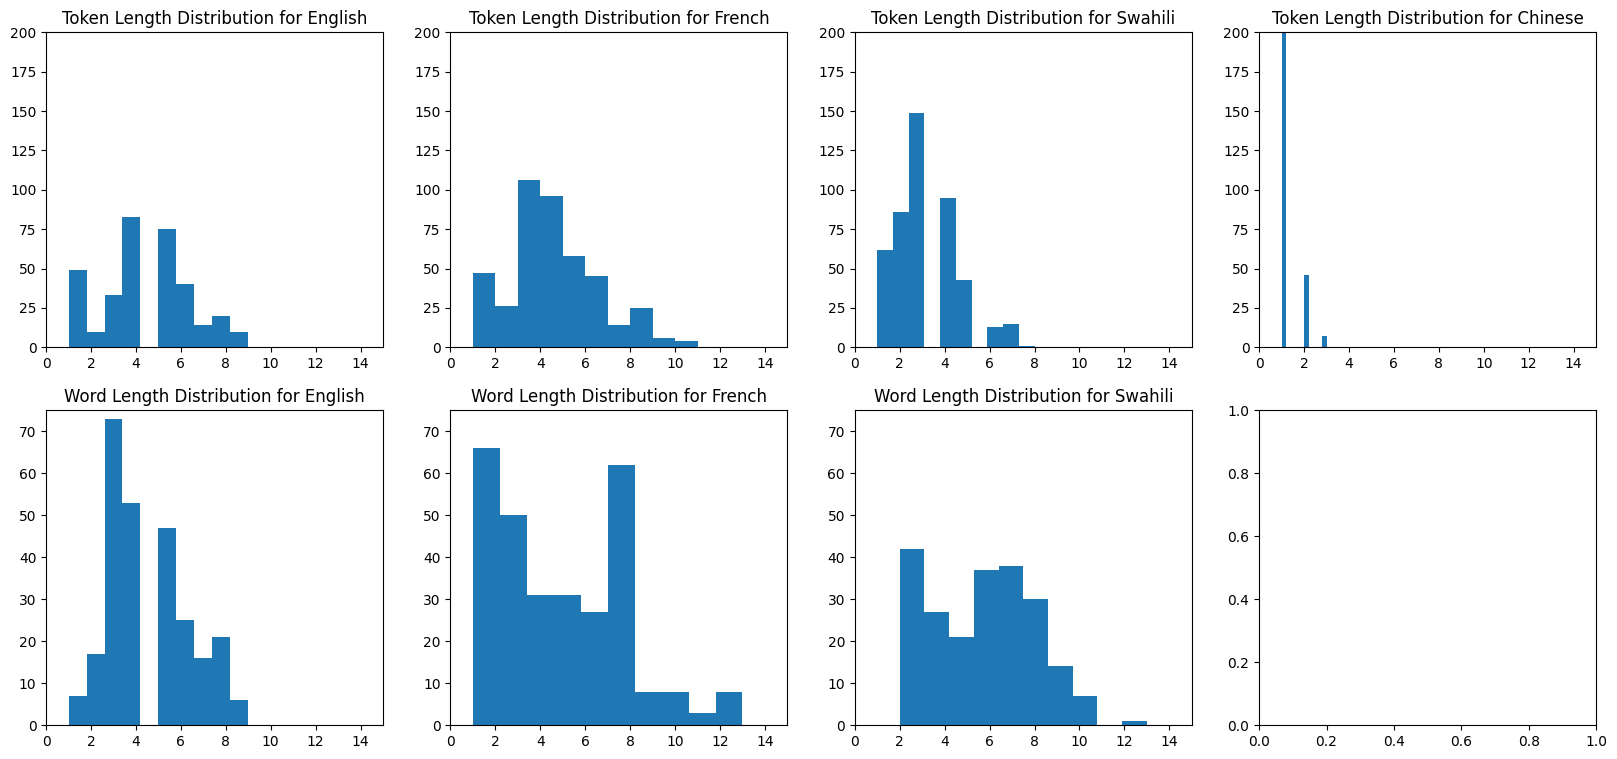

In [ ]:
import matplotlib.pyplot as plt

def plot_token_length_histogram(text, language_name):
    encoding = tiktoken.encoding_for_model('gpt-4o')
    tokens = encoding.encode(text)

    decoded_tokens = [encoding.decode([t]) for t in tokens]
    token_lengths = [len(t) for t in decoded_tokens]
    plt.hist(token_lengths, bins=10)
    plt.title(f'Token Length Distribution for {language_name}')
    plt.xlim([0,15])
    plt.ylim([0,200])

def plot_word_length_histogram(text, language_name):
    if language != 'Chinese':
        word_lengths = [len(t) for t in text.split()]
        plt.hist(word_lengths, bins=10)
        plt.title(f'Word Length Distribution for {language_name}')
        plt.xlim([0,15])
        plt.ylim([0,75])

plt.figure(figsize=(20, 9))

for i, language in enumerate(['English', 'French', 'Swahili', 'Chinese']):
    # Token length histograms
    plt.subplot(2, 4, 1 + i)
    plot_token_length_histogram(excerpts[language], language)

    # Word length histograms
    plt.subplot(2, 4, 5 + i)
    plot_word_length_histogram(excerpts[language], language)


Which peculiarities do you observe?

**Task 3.** Check how the tokenizer splits the Chinese text. You will find that some of the tokens are strange and have no clear correspondence in the text. Why do we have such tokens?